In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from scipy.stats import poisson

In [2]:
gss_df = pd.read_hdf('gss.hdf5', 'gss')
gss_df.head()

year   age  cohort  sex  race  educ  realinc  gunlaw  grass  wtssall
0  1972  26.0  1946.0    1     1  18.0  13537.0     2.0    NaN   0.8893
1  1972  38.0  1934.0    2     1  12.0  18951.0     1.0    NaN   0.4446
2  1972  57.0  1915.0    1     1  12.0  30458.0     1.0    NaN   1.3339
3  1972  61.0  1911.0    2     1  14.0  37226.0     1.0    NaN   0.8893
4  1972  59.0  1913.0    1     1  12.0  30458.0     2.0    NaN   0.8893

In [3]:
fig, ax = plt.subplots()
gss_df.hist('educ', ax=ax)
plt.show()

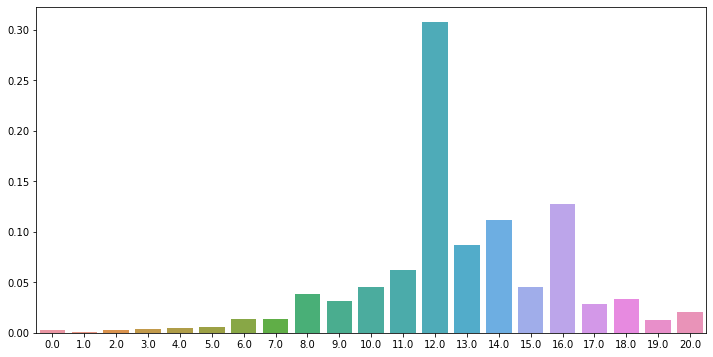

In [41]:
# Probability Mass Function
fig, ax = plt.subplots(figsize=(12, 6))
prob = gss_df['educ'].value_counts(normalize=True)
sns.barplot(prob.index, prob.values, ax=ax)
plt.show()

In [45]:
prob_df = pd.DataFrame(prob).reset_index()
prob_df.sort_values('index', inplace=True)
prob_df.head(10)

index      educ
19    0.0  0.002311
20    1.0  0.000610
18    2.0  0.002424
17    3.0  0.003948
16    4.0  0.004655
15    5.0  0.006083
13    6.0  0.013514
12    7.0  0.013803
7     8.0  0.038858
9     9.0  0.031507

In [46]:
fig, ax = plt.subplots()
ax.plot(prob_df['index'], prob_df.educ)
plt.show()

## Cumulative Distribution Functions

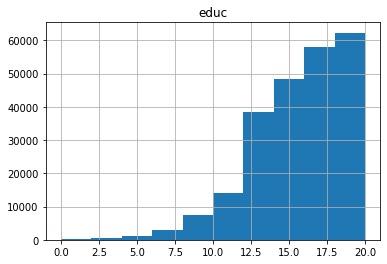

In [5]:
fig, ax = plt.subplots()
gss_df.hist('educ', cumulative=True, ax=ax)
plt.show()


In [6]:
edu = gss_df['educ']
edu = edu.sort_values()

# append again the last (and largest) value to get an unbiased CDF
edu[len(edu)] = edu.iloc[-1]
cum_edu = np.linspace(0., 1., len(edu))
edu_cdf = pd.Series(cum_edu, index=edu)

fig, ax = plt.subplots()
edu_cdf.plot(drawstyle='steps', ax=ax)
ax.grid()
plt.show()

In [7]:
# IQR
percentile_75th = gss_df.realinc.quantile(.75)
percentile_25th = gss_df.realinc.quantile(.25)

iqr = percentile_75th - percentile_25th
print(iqr)


29676.0


## Comparing distributions

In [8]:
# Multiple PMF's
# age distribution for genders
male = gss_df['sex'] == 1
age = gss_df['age']
male_age = age[male]
female_age = age[~male]

In [47]:
male_age_probs = pd.DataFrame(male_age.value_counts(normalize=True)).reset_index()
female_age_probs = pd.DataFrame(female_age.value_counts(normalize=True)).reset_index()

male_age_probs.sort_values('index', inplace=True)
female_age_probs.sort_values('index', inplace=True)


In [49]:
male_age_probs.head()

index       age
57   18.0  0.005982
2    19.0  0.022459
26   20.0  0.018156
17   21.0  0.019801
11   22.0  0.020850

In [51]:
fig, ax = plt.subplots()
ax.plot(male_age_probs['index'], male_age_probs.age, label='male')
ax.plot(female_age_probs['index'], female_age_probs.age, label='female')
ax.legend()
plt.show()

In [52]:
# CDF
age_male_sorted = male_age_probs.age.sort_values()
age_female_sorted = female_age_probs.age.sort_values()

age_male_sorted[len(age_male_sorted)] = age_male_sorted.iloc[-1]
age_female_sorted[len(age_female_sorted)] = age_female_sorted.iloc[-1]


cum_age_male = np.linspace(0., 1., len(age_male_sorted))
cum_age_female = np.linspace(0., 1., len(age_female_sorted))

fig, ax = plt.subplots()
ax.plot(cum_age_male, age_male_sorted, label='male')
ax.plot(cum_age_female, age_female_sorted, label='female')
ax.grid()
ax.legend()
plt.show()

In [53]:
# education level

educ = gss_df['educ']
bachelor = (educ >= 16)
associate = ((educ >= 14) & (educ < 16))
high = (educ <= 12)

In [54]:
print(f"bachelor mean: {bachelor.mean()}")
print(f"associate mean: {associate.mean()}")
print(f"high mean: {high.mean()}")

bachelor mean: 0.2228572343354785
associate mean: 0.1571414849678225
high mean: 0.5308807991547402


In [98]:
def plot_cdf(label_series_dict):
    """
    Plot CDF of series
    Parameters:
    -----------
    label_series_dic: dict(label: series)
    Returns:
    --------
    CDF plot
    """
    x = []
    y = []
    labels=[]
    for key, elem in label_series_dict.items():
        labels.append(key)
        if type(elem) == pd.core.series.Series:
            ser_sorted = elem.sort_values()
            ser_sorted[len(ser_sorted)] = ser_sorted.iloc[-1]
        elif type(elem) == np.ndarray:
            elem.sort()
            ser_sorted = np.append(elem, elem[-1])
        cum_ser = np.linspace(0., 1., len(ser_sorted))
        y.append(cum_ser)
        x.append(ser_sorted)

    fig, ax = plt.subplots()
    for i in range(len(x)):
        ax.plot(x[i], y[i], label=labels[i])
    ax.legend()
    plt.show()

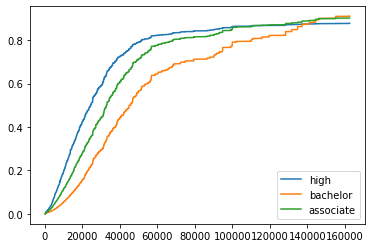

In [99]:
income = gss_df['realinc']
plot_cdf({'high': income[high], 'bachelor': income[bachelor], 'associate': income[associate]})

## Modelling Distributions

### Normal Distributions

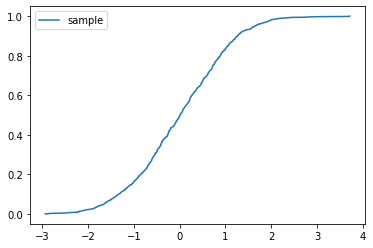

In [100]:
sample = np.random.normal(size=1000)
plot_cdf({'sample': sample})

In [101]:
from scipy.stats import norm

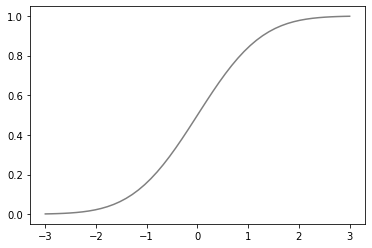

In [102]:
xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)
plt.plot(xs, ys, color='gray')
plt.show()

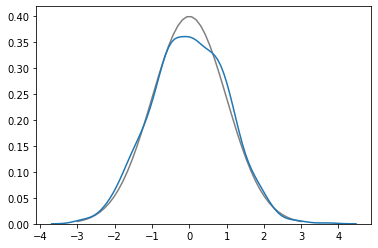

In [104]:
xs = np.linspace(-3, 3)
ys = norm(0, 1).pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)
plt.show()